In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json("race_data.json")
df = df.drop(columns = ["_id"])
df

,session_key,session_type,position,driver_number,full_name,team_name,lap_number,circuit_key,location,year,headshot_url
0,7775,Qualifying,15,1,Max VERSTAPPEN,{'$numberDouble': 'NaN'},6,149,Jeddah,2023,{'$numberDouble': 'NaN'}
1,7775,Qualifying,20,2,Logan SARGEANT,{'$numberDouble': 'NaN'},8,149,Jeddah,2023,{'$numberDouble': 'NaN'}
2,7775,Qualifying,19,4,Lando NORRIS,{'$numberDouble': 'NaN'},4,149,Jeddah,2023,{'$numberDouble': 'NaN'}
3,7775,Qualifying,10,10,Pierre GASLY,{'$numberDouble': 'NaN'},23,149,Jeddah,2023,{'$numberDouble': 'NaN'}
4,7775,Qualifying,1,11,Sergio PEREZ,{'$numberDouble': 'NaN'},18,149,Jeddah,2023,{'$numberDouble': 'NaN'}
...,...,...,...,...,...,...,...,...,...,...,...
273,9998,Race,6,44,Lewis HAMILTON,Ferrari,56,49,Shanghai,2025,https://media.formula1.com/d_driver_fallback_i...
274,9998,Race,13,55,Carlos SAINZ,Williams,56,49,Shanghai,2025,https://media.formula1.com/d_driver_fallback_i...
275,9998,Race,3,63,George RUSSELL,Mercedes,56,49,Shanghai,2025,https://media.formula1.com/d_driver_fallback_i...
276,9998,Race,1,81,Oscar PIASTRI,McLaren,56,49,Shanghai,2025,https://media.formula1.com/d_driver_fallback_i...


In [3]:
df_subset = df[["position", "driver_number", "full_name", "session_type"]]
df_subset

,position,driver_number,full_name,session_type
0,15,1,Max VERSTAPPEN,Qualifying
1,20,2,Logan SARGEANT,Qualifying
2,19,4,Lando NORRIS,Qualifying
3,10,10,Pierre GASLY,Qualifying
4,1,11,Sergio PEREZ,Qualifying
...,...,...,...,...
273,6,44,Lewis HAMILTON,Race
274,13,55,Carlos SAINZ,Race
275,3,63,George RUSSELL,Race
276,1,81,Oscar PIASTRI,Race


In [4]:
placements = {}

for _, row in df_subset.iterrows():
    driver = row["full_name"]
    placement = row["position"]

    if driver not in placements:
        placements[driver] = []

    placements[driver].append(placement)

print(f"Placements: {placements}")

Placements: {'Max VERSTAPPEN': [15, 2, 1, 1, 3, 2, 15, 2, 1, 1, 3, 2, 4, 4], 'Logan SARGEANT': [20, 16, 19, 15, 20, 16, 19, 15], 'Lando NORRIS': [19, 17, 6, 8, 1, 1, 19, 17, 6, 8, 1, 1, 3, 2], 'Pierre GASLY': [10, 9, 18, 20, 9, 11, 10, 9, 18, 20, 9, 11, 16, 11], 'Sergio PEREZ': [1, 1, 3, 2, 1, 1, 3, 2], 'Fernando ALONSO': [3, 3, 4, 5, 12, 17, 3, 3, 4, 5, 12, 17, 13, 20], 'Charles LECLERC': [2, 7, 2, 3, 7, 8, 2, 7, 2, 3, 7, 8, 6, 5], 'Lance STROLL': [6, 20, 10, 19, 13, 6, 6, 20, 10, 19, 13, 6, 14, 12], 'Kevin MAGNUSSEN': [13, 10, 13, 12, 13, 10, 13, 12], 'Nyck DE VRIES': [18, 14, 18, 14], 'Yuki TSUNODA': [16, 11, 9, 14, 5, 12, 16, 11, 9, 14, 5, 12, 9, 19], 'Alexander ALBON': [17, 19, 12, 11, 6, 4, 17, 19, 12, 11, 6, 4, 10, 9], 'ZHOU Guanyu': [12, 13, 20, 18, 12, 13, 20, 18], 'Nico HULKENBERG': [11, 12, 15, 10, 17, 7, 11, 12, 15, 10, 17, 7, 12, 18], 'Esteban OCON': [7, 8, 17, 13, 19, 13, 7, 8, 17, 13, 19, 13, 11, 7], 'Lewis HAMILTON': [8, 5, 8, 9, 8, 10, 8, 5, 8, 9, 8, 10, 5, 6], 'Carlos

In [5]:
average_pos = {driver: round(sum(positions) / len(positions), 2) for driver, positions in placements.items()}

print(f"Average Placements: {average_pos}")

Average Placements: {'Max VERSTAPPEN': 4.0, 'Logan SARGEANT': 17.5, 'Lando NORRIS': 7.79, 'Pierre GASLY': 12.93, 'Sergio PEREZ': 1.75, 'Fernando ALONSO': 8.64, 'Charles LECLERC': 4.93, 'Lance STROLL': 12.43, 'Kevin MAGNUSSEN': 12.0, 'Nyck DE VRIES': 16.0, 'Yuki TSUNODA': 11.57, 'Alexander ALBON': 11.21, 'ZHOU Guanyu': 15.75, 'Nico HULKENBERG': 12.43, 'Esteban OCON': 12.29, 'Lewis HAMILTON': 7.64, 'Carlos SAINZ': 10.6, 'George RUSSELL': 4.36, 'Valtteri BOTTAS': 16.25, 'Oscar PIASTRI': 6.43, 'Daniel RICCIARDO': 15.0, 'Oliver BEARMAN': 13.3, 'Gabriel BORTOLETO': 16.33, 'Isack HADJAR': 10.75, 'Jack DOOHAN': 17.0, 'Andrea Kimi ANTONELLI': 10.5, 'Liam LAWSON': 15.83, 'Kimi ANTONELLI': 8.0}


In [6]:
def get_avg_pos(item):
    return item[1]  # Extracts the average position value

sorted_avg_pos = dict(sorted(average_pos.items(), key = get_avg_pos))
print(sorted_avg_pos)

sorted_avg_pos.pop("Sergio PEREZ")
sorted_avg_pos.pop("Kevin MAGNUSSEN")
sorted_avg_pos.pop("Daniel RICCIARDO")
sorted_avg_pos.pop("ZHOU Guanyu")
sorted_avg_pos.pop("Logan SARGEANT")

print(sorted_avg_pos)

{'Sergio PEREZ': 1.75, 'Max VERSTAPPEN': 4.0, 'George RUSSELL': 4.36, 'Charles LECLERC': 4.93, 'Oscar PIASTRI': 6.43, 'Lewis HAMILTON': 7.64, 'Lando NORRIS': 7.79, 'Kimi ANTONELLI': 8.0, 'Fernando ALONSO': 8.64, 'Andrea Kimi ANTONELLI': 10.5, 'Carlos SAINZ': 10.6, 'Isack HADJAR': 10.75, 'Alexander ALBON': 11.21, 'Yuki TSUNODA': 11.57, 'Kevin MAGNUSSEN': 12.0, 'Esteban OCON': 12.29, 'Lance STROLL': 12.43, 'Nico HULKENBERG': 12.43, 'Pierre GASLY': 12.93, 'Oliver BEARMAN': 13.3, 'Daniel RICCIARDO': 15.0, 'ZHOU Guanyu': 15.75, 'Liam LAWSON': 15.83, 'Nyck DE VRIES': 16.0, 'Valtteri BOTTAS': 16.25, 'Gabriel BORTOLETO': 16.33, 'Jack DOOHAN': 17.0, 'Logan SARGEANT': 17.5}
{'Max VERSTAPPEN': 4.0, 'George RUSSELL': 4.36, 'Charles LECLERC': 4.93, 'Oscar PIASTRI': 6.43, 'Lewis HAMILTON': 7.64, 'Lando NORRIS': 7.79, 'Kimi ANTONELLI': 8.0, 'Fernando ALONSO': 8.64, 'Andrea Kimi ANTONELLI': 10.5, 'Carlos SAINZ': 10.6, 'Isack HADJAR': 10.75, 'Alexander ALBON': 11.21, 'Yuki TSUNODA': 11.57, 'Esteban OCO

<function matplotlib.pyplot.show(close=None, block=None)>

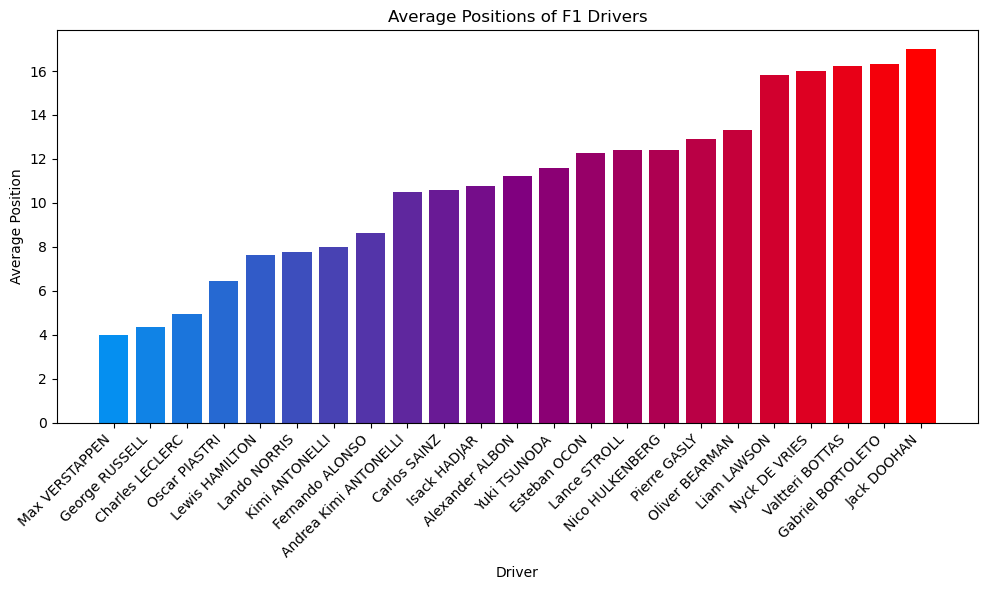

In [7]:
drivers = list(sorted_avg_pos.keys())
avg_pos = list(sorted_avg_pos.values())

import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# define custom colormap
colors = ["#058ff0", "#800080", "#FF0000"]
cmap = LinearSegmentedColormap.from_list("blue_purple_red", colors, N = 256)

# generate range for colors (0 to 1 for the gradient)
gradient = np.linspace(0, 1, len(sorted_avg_pos))

# map gradient to custom colormap
bar_colors = cmap(gradient)

plt.figure(figsize = (10, 6))
plt.bar(drivers, avg_pos, color = bar_colors)

plt.xlabel("Driver")
plt.ylabel("Average Position")
plt.title("Average Positions of F1 Drivers")

plt.xticks(rotation = 45, ha = "right")
plt.tight_layout()

plt.show